In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

C:\Users\Нур\AppData\Roaming\Python\Python39\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\Нур\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
C:\Users\Нур\AppData\Local\Temp\ipykernel_8980\2471291689.py:6: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as

Hi everyone,

Here i have used Tensorflow keras CNN model in this kernal to predict 5 class label in dataset for eye disease classification.

First of all import all the necessary libraries 

In [6]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import cv2
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten
from tensorflow.keras.layers import Conv2D,MaxPool2D
from tensorflow.keras.layers import Input, Dense
from keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

from tensorflow.keras.applications.vgg16 import VGG16
import pandas as pd
import numpy as np
import os
from numpy import argmax


Now here read all the directories available in eye disease folder

In [9]:
PATH = "Eye_diseases"
data_dir_list = os.listdir(PATH)
data_dir_list

['Bulging_Eyes',
 'Cataracts',
 'Crossed_Eyes',
 'Eye_diseases',
 'Glaucoma',
 'Uveitis']

Now here we'll prepare data to feed into the model. first read all the images from the dataset and resize it with specific size and prepare all the image data list for multiple folder with  target column.

In [17]:
img_rows=224
img_cols=224
num_channel=3

num_epoch = 5
batch_size = 32

img_data_list=[]
classes_names_list=[]
target_column=[]
for dataset in data_dir_list:
    classes_names_list.append(dataset)
    print("Getting image from {} folder".format(dataset))
    img_list= os.listdir(PATH +"/"+ dataset)
    for img in img_list:
        input_img = cv2.imread(PATH +"/"+dataset+"/"+img)
        input_img_resize=cv2.resize(input_img,(img_rows,img_cols))
        img_data_list.append(input_img_resize)
        target_column.append(dataset)

Getting image from Bulging_Eyes folder
Getting image from Cataracts folder
Getting image from Crossed_Eyes folder
Getting image from Eye_diseases folder


error: OpenCV(4.8.1) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


In [18]:
num_classes = len(classes_names_list)
print("num_classes",num_classes)
img_data = np.array(img_data_list) # convert images in numpy array 
img_data = img_data.astype('float32')
img_data /= 255
print("Shape of image data",img_data.shape)
num_of_samples = img_data.shape[0]
input_shape = img_data[0].shape 
print("number of samples",num_of_samples)
print("target column before encoding",target_column)

num_classes 4
Shape of image data (251, 224, 224, 3)
number of samples 251
target column before encoding ['Bulging_Eyes', 'Bulging_Eyes', 'Bulging_Eyes', 'Bulging_Eyes', 'Bulging_Eyes', 'Bulging_Eyes', 'Bulging_Eyes', 'Bulging_Eyes', 'Bulging_Eyes', 'Bulging_Eyes', 'Bulging_Eyes', 'Bulging_Eyes', 'Bulging_Eyes', 'Bulging_Eyes', 'Bulging_Eyes', 'Bulging_Eyes', 'Bulging_Eyes', 'Bulging_Eyes', 'Bulging_Eyes', 'Bulging_Eyes', 'Bulging_Eyes', 'Bulging_Eyes', 'Bulging_Eyes', 'Bulging_Eyes', 'Bulging_Eyes', 'Bulging_Eyes', 'Bulging_Eyes', 'Bulging_Eyes', 'Bulging_Eyes', 'Bulging_Eyes', 'Cataracts', 'Cataracts', 'Cataracts', 'Cataracts', 'Cataracts', 'Cataracts', 'Cataracts', 'Cataracts', 'Cataracts', 'Cataracts', 'Cataracts', 'Cataracts', 'Cataracts', 'Cataracts', 'Cataracts', 'Cataracts', 'Cataracts', 'Cataracts', 'Cataracts', 'Cataracts', 'Cataracts', 'Cataracts', 'Cataracts', 'Cataracts', 'Cataracts', 'Cataracts', 'Cataracts', 'Cataracts', 'Cataracts', 'Cataracts', 'Cataracts', 'Cataracts'

Here encode the target column becuase we can't use string in model. so here we are using label encoder to encode target column.

In [19]:
Labelencoder = LabelEncoder()
target_column = Labelencoder.fit_transform(target_column)
np.unique(target_column)

array([0, 1, 2], dtype=int64)

Now check the target column value after the encoding

In [20]:
target_column

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

Now lets split data with validation split equal to 30% from training data. Validation split is used to determine that our model is not geting over-fitted.

In [21]:
target_column_hotcoded = to_categorical(target_column,num_classes)
X,Y = shuffle(img_data,target_column_hotcoded,random_state=2)
X_train,X_temp,y_train,y_temp = train_test_split(X,Y,test_size=0.3,random_state=2)
X_test,X_val,y_test,y_val = train_test_split(X_temp,y_temp,test_size=0.3,random_state=2)

Create CNN Model to predict class label for eye disease

In [22]:
first_Mod = Sequential()

first_Mod.add(Conv2D(64,(3,3),activation='relu',input_shape=input_shape))
first_Mod.add(Conv2D(64,(3,3),activation='relu'))
first_Mod.add(MaxPool2D(pool_size=(2,2)))
first_Mod.add(Dropout(0.2))

first_Mod.add(Flatten())
first_Mod.add(Dense(128,activation='relu'))
first_Mod.add(Dropout(0.2))
first_Mod.add(Dense(num_classes,activation='softmax'))
first_Mod.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

first_Mod.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 64)      1792      
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 64)      36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 110, 110, 64)     0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 110, 110, 64)      0         
                                                                 
 conv2d_6 (Conv2D)           (None, 108, 108, 128)     73856     
                                                                 
 conv2d_7 (Conv2D)           (None, 106, 106, 128)     147584    
                                                      

Now fit the data in the model and evaluate the model accuracy and Loss.

In [23]:
hist = first_Mod.fit(X_train,y_train,batch_size=batch_size,epochs=num_epoch,verbose=1,validation_data=(X_test,y_test))
score = first_Mod.evaluate(X_test,y_test,batch_size=batch_size)
print('Test Loss',score[0])
print("Test Accuracy",score[1])

Epoch 1/5
6/6 [==============================] - 37s 6s/step - loss: 5.9615 - accuracy: 0.3943 - val_loss: 0.7641 - val_accuracy: 0.7736
Epoch 2/5
6/6 [==============================] - 38s 7s/step - loss: 0.9473 - accuracy: 0.6743 - val_loss: 0.7204 - val_accuracy: 0.7736
Epoch 3/5
6/6 [==============================] - 39s 6s/step - loss: 0.8787 - accuracy: 0.6686 - val_loss: 0.6751 - val_accuracy: 0.7736
Epoch 4/5
6/6 [==============================] - 32s 5s/step - loss: 0.8737 - accuracy: 0.6743 - val_loss: 0.7075 - val_accuracy: 0.7736
Epoch 5/5
2/2 [==============================] - 1s 547ms/step - loss: 0.6963 - accuracy: 0.7736
Test Loss 0.696319580078125
Test Accuracy 0.7735849022865295


In [31]:
import tensorflow as tf

In [37]:
converter = tf.lite.TFLiteConverter.from_keras_model(first_Mod)
tf_con=converter.convert()

with open("model.tflite","wb") as f:
    f.write(tf_con)

INFO:tensorflow:Assets written to: C:\Users\4978~1\AppData\Local\Temp\tmp0e9c66uw\assets


INFO:tensorflow:Assets written to: C:\Users\4978~1\AppData\Local\Temp\tmp0e9c66uw\assets


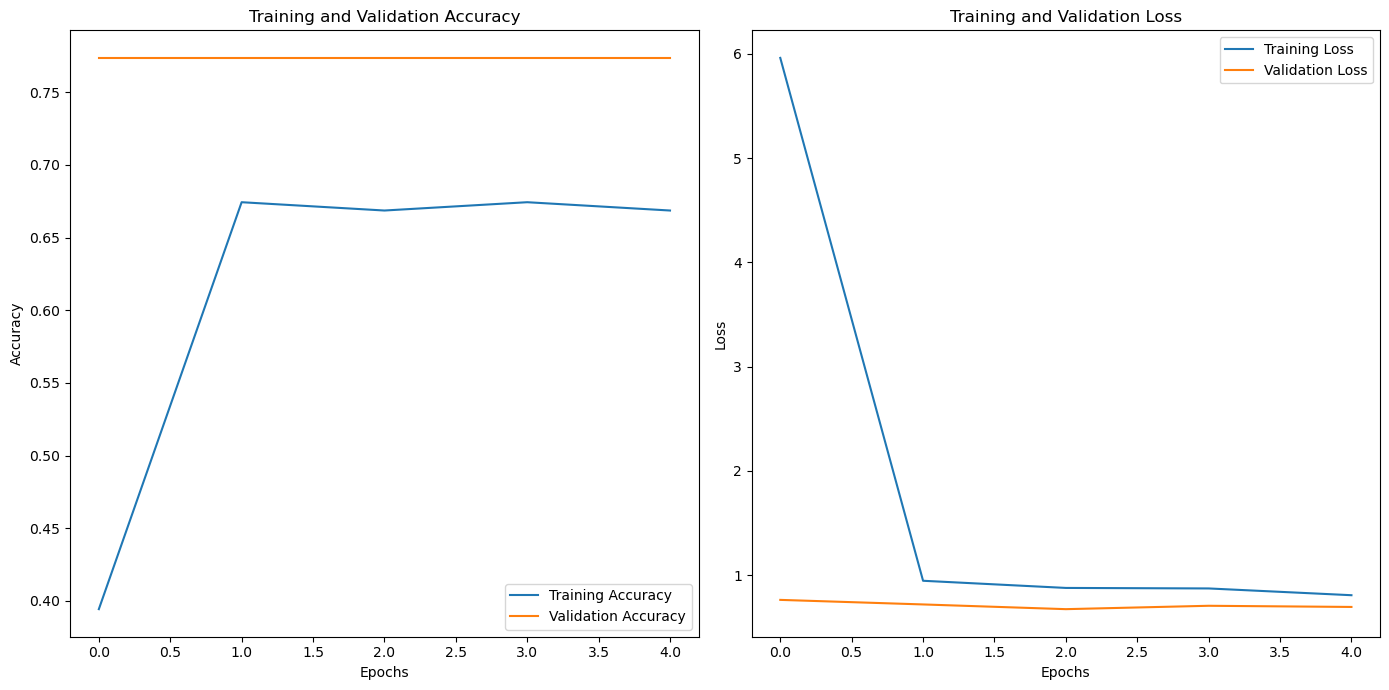

In [29]:
import matplotlib.pyplot as plt

# Extracting the history data
history = hist.history
epochs = range(0, 5)

# Plotting training and validation accuracy
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.plot(epochs, history['accuracy'], label='Training Accuracy')
plt.plot(epochs, history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs, history['loss'], label='Training Loss')
plt.plot(epochs, history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()